In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
from IPython.display import display
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [2]:
from LoadMultiFiles import LoadOneFileUproot
dir_map = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/tag_event/root/sn_tag_0.root",
                            name_branch="evtTruth", return_list=False)
dir_AP = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/AfterPulsePrediction/root/TagAfterPulse_0.root",
                            name_branch="AfterPulseTag", return_list=False)
dir_PSD = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/PSD/root/user_PSD_0_SN.root",
                           name_branch="PSD", return_list=False)
dir_IBD = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/PromptDelayedSignalSelection/root_PromptDelayedSelection/IBD_0_optimized.root",
                            name_branch="IBDSelection", return_list=False)

In [3]:
import seaborn as sns
import pandas as pd
df_AP = pd.DataFrame.from_dict(dir_AP)
df_map = pd.DataFrame.from_dict(dir_map)
df_PSD = pd.DataFrame.from_dict(dir_PSD)
df_PSD = df_PSD.rename({"evtType":"TagPSD"},axis=1)
df_IBD = pd.DataFrame.from_dict(dir_IBD).set_index("evtID")
df_map = pd.concat( (df_map, df_AP, df_PSD, df_IBD),axis=1)
df_map = df_map.sort_values("TriggerTime").reset_index()

R_FV_cut = 17
df_map

,index,evtID,nuE,evtType,recE,recX,recY,recZ,ratioSN,ratioDN,...,entryGen,TotalCharge_lastEvt,TriggerTimeIntervalWithFilter,TotalCharge,TagAP,psdVal,TagPSD,TagIBDp,TagIBDd,IBDSource
0,0,0,19.983615,pES,0.195969,-4925.322266,-2619.566650,3983.017334,0.319780,0.671429,...,6,0.000000,1000.000,744.910091,0,4.332481e-03,2,0,0,-1
1,1,1,72.964650,N12,58.678581,-6283.850098,12852.231445,-4924.565430,0.981472,0.005437,...,7,0.000000,1000.000,113116.718872,0,9.998755e-01,1,0,0,-1
2,2,2,72.964650,AfterPulse,0.444959,139.278885,-23.865454,568.739075,0.028527,0.382421,...,7,113116.718872,1.095,1045.376907,1,5.603862e-03,2,0,0,0
3,3,3,0.000000,AfterPulse,0.287102,81.301765,-534.210999,12.567459,0.000000,0.280500,...,7,113116.718872,3.235,499.848627,1,7.416920e-07,2,0,0,0
4,4,4,12.503522,IBDp,12.297911,4992.425293,10178.103516,4714.770996,0.961626,0.025472,...,13,0.000000,1000.000,22466.255727,0,9.968648e-01,1,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,18664,18664,13.158622,IBDp,12.726572,-7299.820801,4423.094727,-8364.102539,0.961896,0.024873,...,14092,0.000000,1000.000,22716.439760,0,9.985903e-01,1,1,0,-1
18664,18665,18665,13.158622,IBDd,2.300554,-7529.791504,4455.890137,-8275.335938,0.859468,0.127006,...,14092,0.000000,1000.000,4500.187693,0,9.971751e-01,1,0,1,18664
18665,18666,18666,17.317196,IBDp,17.081907,5044.806152,14350.795898,3421.122070,0.968430,0.018737,...,14093,0.000000,1000.000,33086.969728,0,9.998966e-01,1,1,0,-1
18666,18667,18667,17.317196,IBDd,2.229551,6145.125000,14461.286133,3196.138916,0.861417,0.121205,...,14093,0.000000,1000.000,4655.523785,0,9.983866e-01,1,0,1,18666


## Try to find back detID in pipe up events
* len(detIDs) > 1

In [4]:
df_map_reset_index = df_map.set_index(["fileNo","detID"]).sort_index()
for index, row in df_map[ (df_map["detID"]==-1) & ( (df_map["evtType"]=="IBDd") | (df_map["evtType"]=="IBDp") )].iterrows():
    if len(row["detIDs"]) >0:
        for detID in row["detIDs"]:
            if detID not in df_map_reset_index.loc[ row["fileNo"] ].index:
                continue
            v_evtType = list( df_map_reset_index.loc[ (row["fileNo"],detID) ]["evtType"])
            if ( ("IBDp" in v_evtType) and ("IBDd" in v_evtType) ) or ("IBD" not in "".join(v_evtType) ) :
                continue
            df_map.at[index, "detID"] = np.array( df_map.set_index(["fileNo","detID"]).loc[ (row["fileNo"],detID ) ].index.get_level_values("detID") )[0]
        # break
# display(df_map.loc[101])


/tmp/ipykernel_22441/3334411446.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_map.at[index, "detID"] = np.array( df_map.set_index(["fileNo","detID"]).loc[ (row["fileNo"],detID ) ].index.get_level_values("detID") )[0]
/tmp/ipykernel_22441/3334411446.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_map.at[index, "detID"] = np.array( df_map.set_index(["fileNo","detID"]).loc[ (row["fileNo"],detID ) ].index.get_level_values("detID") )[0]
/tmp/ipykernel_22441/3334411446.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_map.at[index, "detID"] = np.array( df_map.set_index(["fileNo","detID"]).loc[ (row["fileNo"],detID ) ].index.get_level_values("detID") )[0]
/tmp/ipykernel_22441/3334411446.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_map.at[index, "detID"] = np.array( df_map.set_index(["fileNo","detID"]).loc[ (row["fileNo"],detID ) ].index.get_level_v

# Trigger Time Interval Distribution

In [5]:
from PlotDetectorGeometry import GetR3_XYZ
df_map["R"] = GetR3_XYZ( df_map["recX"],df_map["recY"], df_map["recZ"] )**(1/3)/1e3
df_map["R^3"] = GetR3_XYZ( df_map["recX"],df_map["recY"], df_map["recZ"] )/1e9
df_map["TriggerTime"] /= 1e3
df_map["TriggerTimeInterval"] = np.concatenate( ([0],np.diff( df_map["TriggerTime"] )) )
df_map

,index,evtID,nuE,evtType,recE,recX,recY,recZ,ratioSN,ratioDN,...,TriggerTimeIntervalWithFilter,TotalCharge,TagAP,psdVal,TagPSD,TagIBDp,TagIBDd,IBDSource,R,R^3
0,0,0,19.983615,pES,0.195969,-4925.322266,-2619.566650,3983.017334,0.319780,0.671429,...,1000.000,744.910091,0,4.332481e-03,2,0,0,-1,6.854586,322.065186
1,1,1,72.964650,N12,58.678581,-6283.850098,12852.231445,-4924.565430,0.981472,0.005437,...,1000.000,113116.718872,0,9.998755e-01,1,0,0,-1,15.130035,3463.536977
2,2,2,72.964650,AfterPulse,0.444959,139.278885,-23.865454,568.739075,0.028527,0.382421,...,1.095,1045.376907,1,5.603862e-03,2,0,0,0,0.586031,0.201262
3,3,3,0.000000,AfterPulse,0.287102,81.301765,-534.210999,12.567459,0.000000,0.280500,...,3.235,499.848627,1,7.416920e-07,2,0,0,0,0.540508,0.157909
4,4,4,12.503522,IBDp,12.297911,4992.425293,10178.103516,4714.770996,0.961626,0.025472,...,1000.000,22466.255727,0,9.968648e-01,1,1,0,-1,12.277914,1850.860721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,18664,18664,13.158622,IBDp,12.726572,-7299.820801,4423.094727,-8364.102539,0.961896,0.024873,...,1000.000,22716.439760,0,9.985903e-01,1,1,0,-1,11.950287,1706.612877
18664,18665,18665,13.158622,IBDd,2.300554,-7529.791504,4455.890137,-8275.335938,0.859468,0.127006,...,1000.000,4500.187693,0,9.971751e-01,1,0,1,18664,12.043002,1746.643599
18665,18666,18666,17.317196,IBDp,17.081907,5044.806152,14350.795898,3421.122070,0.968430,0.018737,...,1000.000,33086.969728,0,9.998966e-01,1,1,0,-1,15.591648,3790.321657
18666,18667,18667,17.317196,IBDd,2.229551,6145.125000,14461.286133,3196.138916,0.861417,0.121205,...,1000.000,4655.523785,0,9.983866e-01,1,0,1,18666,16.034546,4122.588568


[]

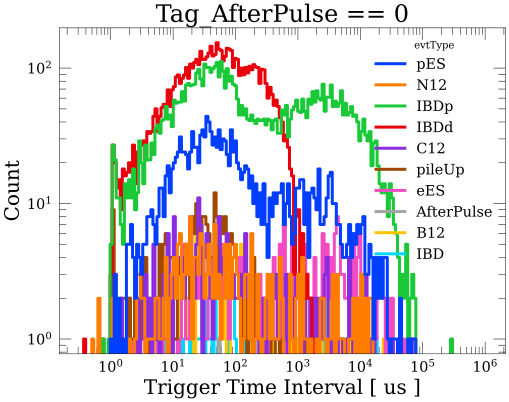

In [6]:
sns.histplot(x="TriggerTimeInterval", data=df_map[df_map["TagAP"]==0], element="step", fill=False,
             bins=np.logspace(-0.5,6, 200), hue="evtType",palette="bright")
plt.xlabel("Trigger Time Interval [ us ]")
plt.title("Tag_AfterPulse == 0")
plt.semilogx()
plt.semilogy()

## Trigger Time Distribution of Different events

[]

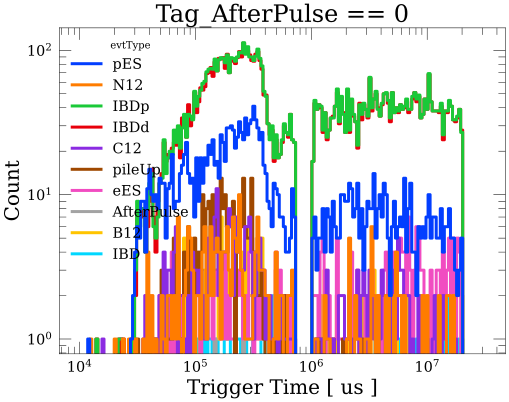

In [7]:
sns.histplot(x="TriggerTime", data=df_map[df_map["TagAP"]==0], element="step", fill=False,
             bins=np.logspace(4,7.5, 200), hue="evtType",palette="bright")
plt.xlabel("Trigger Time [ us ]")
plt.title("Tag_AfterPulse == 0")
plt.semilogx()
plt.semilogy()

## Residual Components
### 1. Energy Sepectrum

/cvmfs/juno.ihep.ac.cn/sw/anaconda/Anaconda3-2020.11-Linux-x86_64/envs/root624/lib/python3.8/site-packages/pandas/core/array_algos/replace.py:85: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


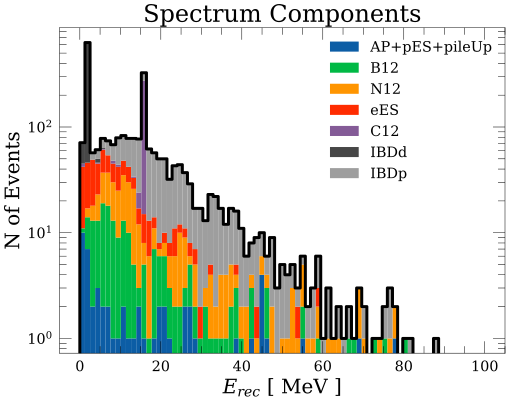

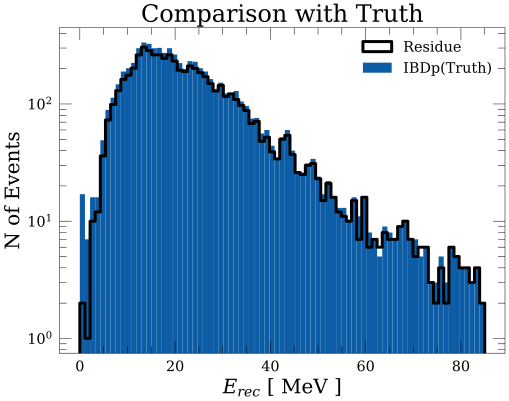

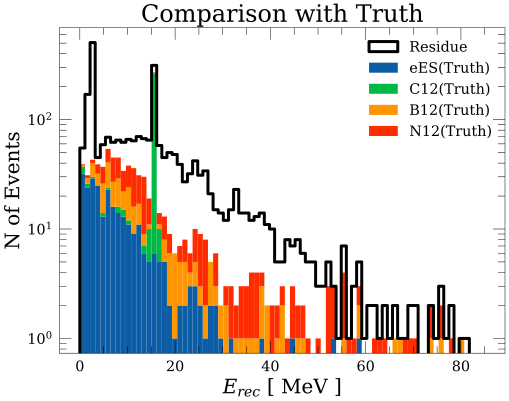

In [15]:
from importlib import reload
import PlotSpectrum
reload(PlotSpectrum)
from PlotSpectrum import PlotSpectrumComponents, CompareWithTruthSpectrum
index_residue = ( (df_map["TagAP"]==0) & (df_map["TagIBDp"]==0) &
                  (df_map["TagIBDd"]==0) & (df_map["TagPSD"]==1) )
tag_other = "AP+pES+pileUp"
PlotSpectrumComponents( df_map[index_residue].replace({"AfterPulse":tag_other, "pES":tag_other,"pileUp":tag_other,"IBD":"IBDp"}) )
plt.figure()
CompareWithTruthSpectrum(df_map[( (df_map["TagAP"]==0) & (df_map["TagIBDp"]==1) )], df_map, v_truth_to_plot=["IBDp"])

plt.figure()
CompareWithTruthSpectrum(df_map[index_residue], df_map, v_truth_to_plot=["eES", "C12", "B12", "N12"])

In [9]:
v_PSD_Tags = [2, 1]
df_map_within_FV = df_map[df_map["R"]<R_FV_cut]
v_Title = ["pES", "eES+CC+NC"]
index_notIBD = ( (df_map_within_FV["TagAP"]==0) & (df_map_within_FV["TagIBDp"]==0) & (df_map_within_FV["TagIBDd"]==0) )
df_residue_components = pd.DataFrame()
for PSD_tag, title in zip( v_PSD_Tags, v_Title ):
    df_temp = df_map_within_FV[ index_notIBD & (df_map_within_FV["TagPSD"]==PSD_tag) ].groupby("evtType").size().reset_index(name=title).set_index("evtType")
    df_temp[title] = df_temp[title]/ np.sum( df_temp[title] )
    df_residue_components = pd.concat( [df_residue_components,df_temp], axis=1)

# IBD Selection
index_IBD_event = ((df_map_within_FV["TagAP"]==0) &
                   ( (df_map_within_FV["TagIBDp"]==1) & (df_map_within_FV["TagIBDd"]==0) )  )
title="IBD"
df_temp = df_map_within_FV[ index_IBD_event ].groupby("evtType").size().reset_index(name=title).set_index("evtType")
df_temp[title] = df_temp[title]/ np.sum( df_temp[title] )
df_residue_components = pd.concat( [df_residue_components,df_temp], axis=1)

df_residue_components =  df_residue_components.fillna(0)
pd.options.display.float_format = '{:,.2f}'.format
df_residue_components*100

,pES,eES+CC+NC,IBD
evtType,,,
AfterPulse,0.18,0.16,0.00
C12,0.12,20.21,0.03
IBD,0.24,1.64,0.05
IBDd,1.07,11.87,0.03
IBDp,1.07,14.08,97.77
eES,0.48,19.07,0.02
pES,94.69,0.65,0.07
pileUp,2.15,2.54,1.97
B12,0.00,12.27,0.05


# What do missed IBDs Look like?


In [10]:
display( df_map[df_map["R"]<R_FV_cut].groupby([ "TagIBDp","TagIBDd","evtType"]).size() )

TagIBDp  TagIBDd  evtType   
0        0        AfterPulse    2343
                  B12            150
                  C12            252
                  IBD             24
                  IBDd           189
                  IBDp           206
                  N12            215
                  eES            241
                  pES           1626
                  pileUp          67
         1        B12              1
                  IBD             19
                  IBDd          5741
                  IBDp             1
                  pileUp          64
1        0        B12              3
                  C12              2
                  IBD              3
                  IBDd             2
                  IBDp          5843
                  eES              1
                  pES              4
                  pileUp         118
dtype: int64

## 1. Missed IBDd

### Missed IBD Events Distribution

Text(0.5, 1.0, 'Missed IBD')

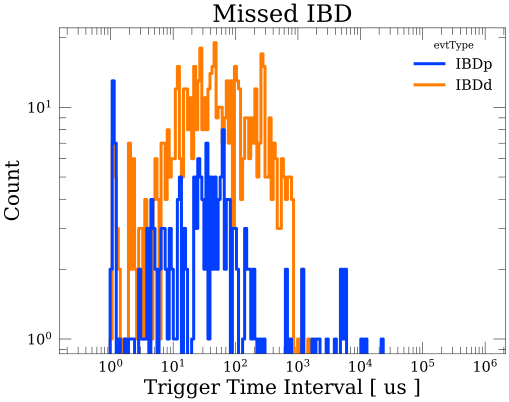

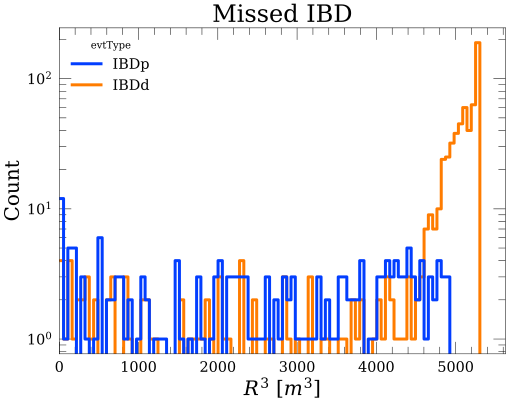

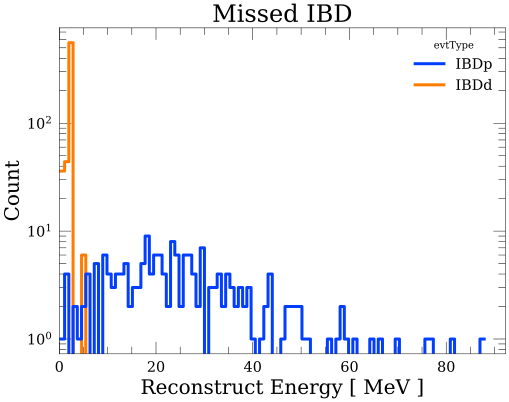

In [11]:
df_map_miss_IBD = df_map[ (df_map["TagAP"]==0) &
                          ( ( (df_map["TagIBDd"]==0) & (df_map["evtType"]=="IBDd") ) |
                            ( (df_map["TagIBDp"]==0) & (df_map["evtType"]=="IBDp") & (df_map["R"]<R_FV_cut) ) ) ]
sns.histplot(x="TriggerTimeInterval",
             data=df_map_miss_IBD,
             element="step", fill=False,
             bins=np.logspace(-0.5,6, 200),
             hue="evtType",palette="bright")
plt.xlabel("Trigger Time Interval [ us ]")
plt.title("Missed IBD")
plt.semilogx()
plt.semilogy()

plt.figure()
sns.histplot(x="R^3",
             data=df_map_miss_IBD,
             element="step", fill=False,
             hue="evtType",palette="bright",
             bins=np.linspace(0, 5360, 100))
plt.xlim(0,)
plt.xlabel("$R^3$ [$m^3$]")
plt.title("Missed IBD")
plt.semilogy()

plt.figure()
sns.histplot(x="recE",
             data=df_map_miss_IBD,
             element="step", fill=False,
             hue="evtType",palette="bright",
             bins=100)
plt.xlim(0,)
plt.semilogy()
plt.xlabel("Reconstruct Energy [ MeV ]")
plt.title("Missed IBD")


## Truth IBD Pair

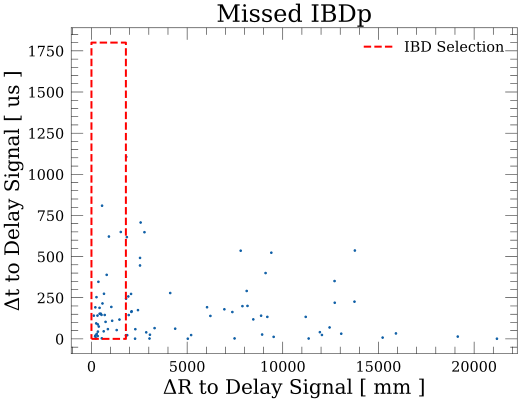

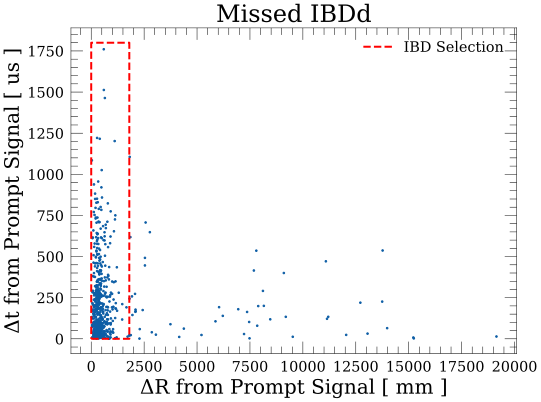

In [12]:
from collections import Counter
def Get_dR(df1, df2):
    df_dR = ( ( df1["recX"]-df2["recX"] )**2+
             ( df1["recY"]-df2["recY"] )**2+
             ( df1["recZ"]-df2["recZ"] )**2 ) ** 0.5
    return df_dR.dropna()

# Get Selection Criteria
def GetMinAndMax(df, key):
    return ( df.loc[key]['min'], df.loc[key]['max'] )
df_parameters = pd.read_xml("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/PromptDelayedSignalSelection/IBDSelectionCriteria_optimized.xml",
                xpath="//condition").set_index("name")

dR_cut = GetMinAndMax(df_parameters, "distance") # mm
t_cut =  GetMinAndMax(df_parameters, "deltaT") # ns
Ed_cut = GetMinAndMax(df_parameters, "denergy")
Ep_cut = GetMinAndMax(df_parameters, "penergy")

v_cut_line_dt = np.array([t_cut[0], t_cut[0], t_cut[1], t_cut[1], t_cut[0]])/1000
v_cut_line_dR = np.array([dR_cut[0], dR_cut[1], dR_cut[1], dR_cut[0], dR_cut[0]])


items_interest = ["evtID","evtType", "recE","TriggerTime", "R", "TriggerTimeInterval", "TagIBDp", "TagIBDd", "IBDSource",
                  "recX", "recY"]
df_map_IBDp_group_by_fileNo = df_map[(df_map["evtType"]=="IBDp")].set_index(["fileNo", "detID"])
df_map_IBDd_group_by_fileNo = df_map[(df_map["evtType"]=="IBDd")].set_index(["fileNo", "detID"])

df_map_IBDp_missed = df_map_miss_IBD[ (df_map_miss_IBD["evtType"]=="IBDp") &
                                      (df_map_miss_IBD["detID"]!=-1) &
                                      (df_map_miss_IBD["R"]<R_FV_cut)].set_index(["fileNo", "detID"])
df_map_IBDd_missed = df_map_miss_IBD[ (df_map_miss_IBD["evtType"]=="IBDd") & (df_map_miss_IBD["detID"]!=-1) ].set_index(["fileNo", "detID"])

dT_missed_IBDp = ( df_map_IBDd_group_by_fileNo["TriggerTime"]-df_map_IBDp_missed["TriggerTime"] ).dropna()
dR_missed_IBDp = Get_dR(df_map_IBDd_group_by_fileNo, df_map_IBDp_missed)
plt.plot(v_cut_line_dR, v_cut_line_dt, color="r", linewidth=2, ls="--", label="IBD Selection")
plt.scatter( dR_missed_IBDp, dT_missed_IBDp,s=3)
plt.xlabel("$\Delta$R to Delay Signal [ mm ]")
plt.ylabel("$\Delta$t to Delay Signal [ us ]")
plt.title("Missed IBDp")
plt.legend()

plt.figure()
dT_missed_IBDd = -( df_map_IBDp_group_by_fileNo["TriggerTime"]-df_map_IBDd_missed["TriggerTime"] ).dropna()
dR_missed_IBDd = Get_dR(df_map_IBDp_group_by_fileNo, df_map_IBDd_missed)
plt.plot(v_cut_line_dR, v_cut_line_dt, color="r", linewidth=2, ls="--",label="IBD Selection")
plt.scatter( dR_missed_IBDd, dT_missed_IBDd,s=3)
plt.xlabel("$\Delta$R from Prompt Signal [ mm ]")
plt.ylabel("$\Delta$t from Prompt Signal [ us ]")
plt.title("Missed IBDd")
plt.legend()

# plt.figure()
# sns.histplot(x="R", data=df_map[df_map["TagIBDp"]==1],bins=np.linspace(0,17.5, 100))


## Show Missed IBD Situation

In [13]:
df_map_miss_IBD["evtID"].iloc[0:100:10]

56        56
415      415
790      793
1153    1156
1358    1370
1567    1573
1692    1697
1901    1906
2165    2175
2314    2324
Name: evtID, dtype: int32

/cvmfs/juno.ihep.ac.cn/sw/anaconda/Anaconda3-2020.11-Linux-x86_64/envs/root624/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/cvmfs/juno.ihep.ac.cn/sw/anaconda/Anaconda3-2020.11-Linux-x86_64/envs/root624/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/cvmfs/juno.ihep.ac.cn/sw/anaconda/Anaconda3-2020.11-Linux-x86_64/envs/root624/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDepre

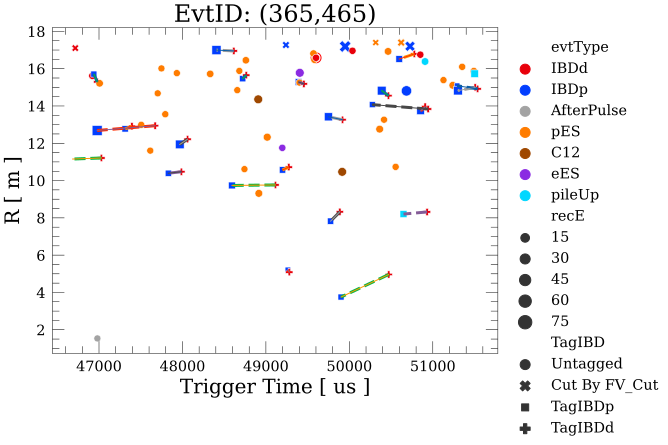

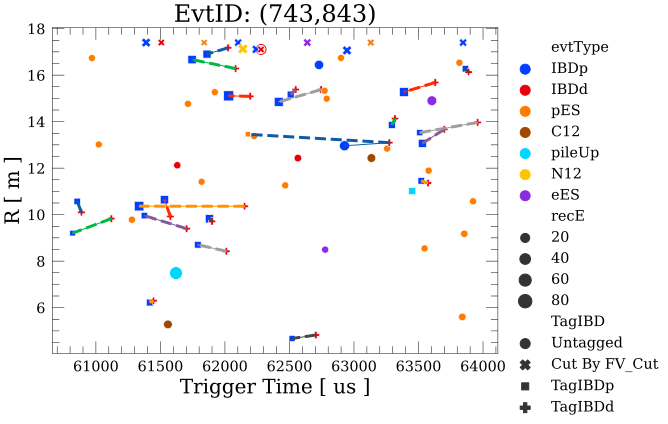

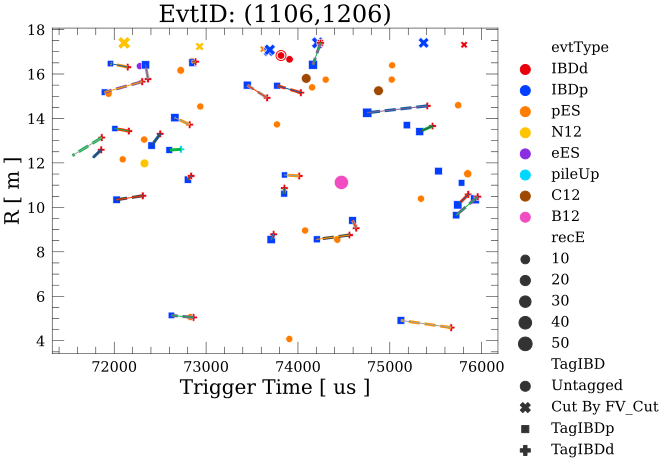

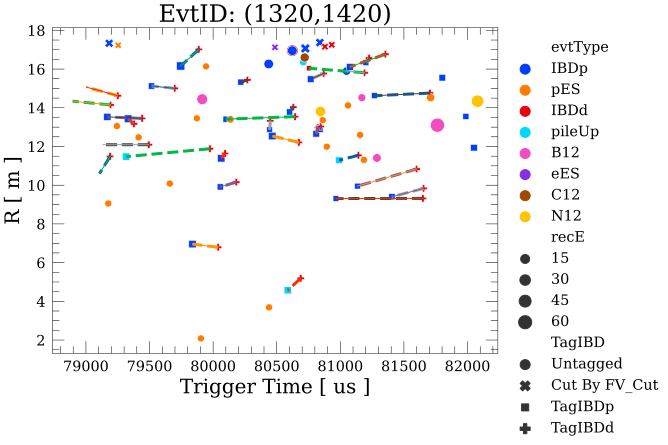

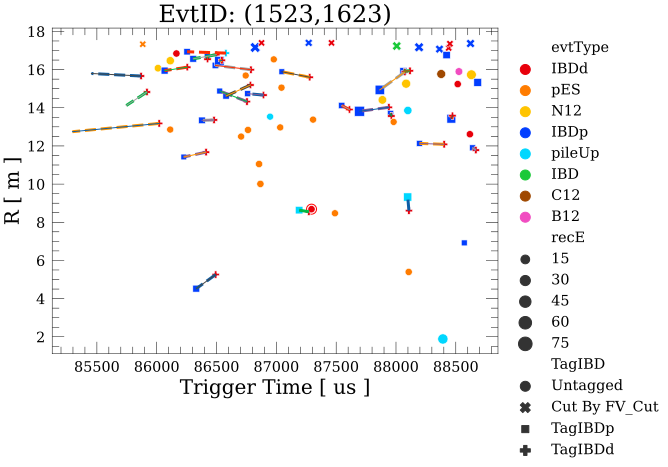

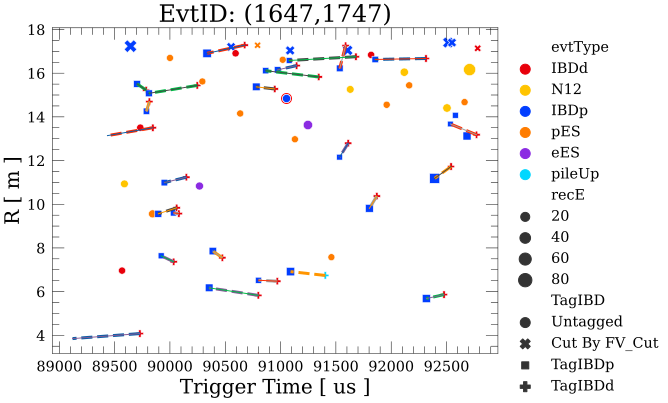

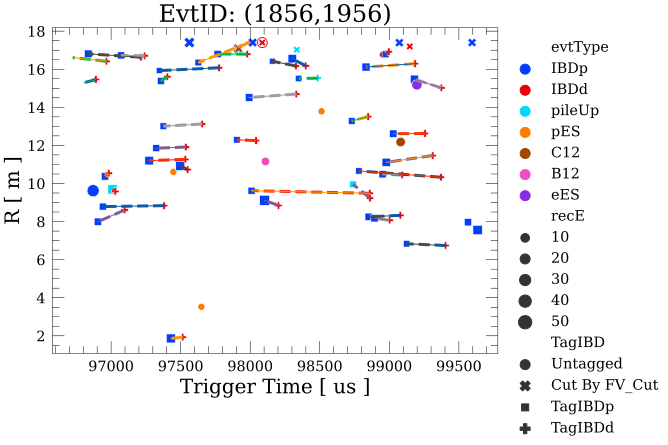

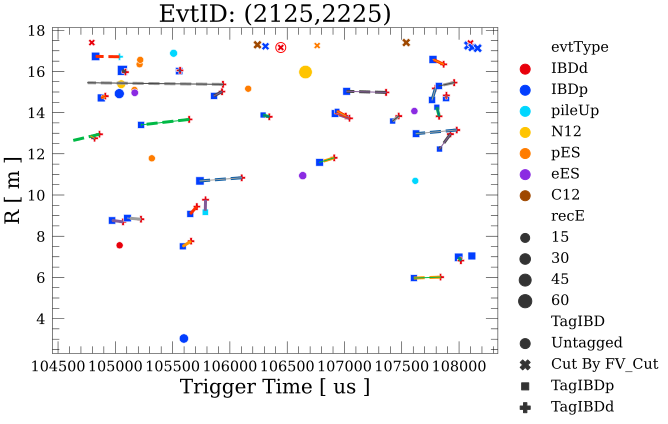

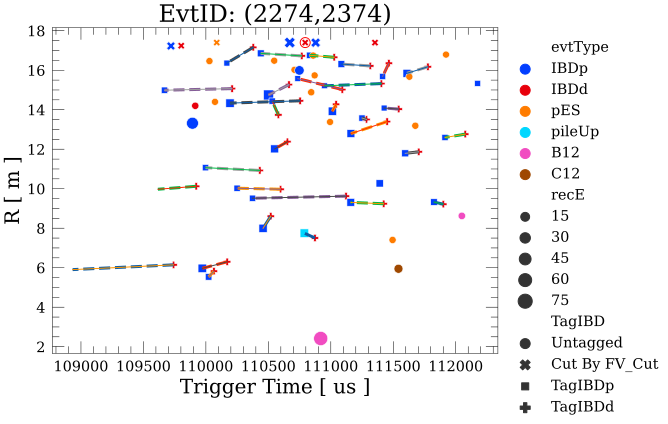

In [14]:
from importlib import reload
import DisplayIBDTimeSeries
reload(DisplayIBDTimeSeries)
from DisplayIBDTimeSeries import PlotTimeSeries
for evtID in df_map_miss_IBD[df_map_miss_IBD["detID"]!=-1]["evtID"].iloc[10:100:10]:
    plt.figure()
    PlotTimeSeries(df_map, evtID-50,evtID+50, FV_cut=R_FV_cut,key_y_plot="R",
                   focus_evtID=evtID)
    plt.xlabel("Trigger Time [ us ]")
    plt.ylabel("R [ m ]")